In [56]:
df<-  read.csv("/content/House-Price.csv")
head(df)

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>,<int>
1,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.04934731,0
2,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.04614563,1
3,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.04576397,0
4,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.04715060,0
5,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.03947400,0
6,28.7,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.2296,None,53,YES,0.04590965,1


##Handling Outliers

In [57]:
summary(df)


     price         resid_area       air_qual         room_num    
 Min.   : 5.00   Min.   :30.46   Min.   :0.3850   Min.   :3.561  
 1st Qu.:17.02   1st Qu.:35.19   1st Qu.:0.4490   1st Qu.:5.886  
 Median :21.20   Median :39.69   Median :0.5380   Median :6.208  
 Mean   :22.53   Mean   :41.14   Mean   :0.5547   Mean   :6.285  
 3rd Qu.:25.00   3rd Qu.:48.10   3rd Qu.:0.6240   3rd Qu.:6.623  
 Max.   :50.00   Max.   :57.74   Max.   :0.8710   Max.   :8.780  
                                                                 
      age             dist1            dist2            dist3       
 Min.   :  2.90   Min.   : 1.130   Min.   : 0.920   Min.   : 1.150  
 1st Qu.: 45.02   1st Qu.: 2.270   1st Qu.: 1.940   1st Qu.: 2.232  
 Median : 77.50   Median : 3.385   Median : 3.010   Median : 3.375  
 Mean   : 68.57   Mean   : 3.972   Mean   : 3.629   Mean   : 3.961  
 3rd Qu.: 94.08   3rd Qu.: 5.367   3rd Qu.: 4.992   3rd Qu.: 5.407  
 Max.   :100.00   Max.   :12.320   Max.   :11.930   Max.  

In [58]:
uv <- quantile(df$n_hot_rooms, 0.99) * 3
max(df$n_hot_rooms)
df$n_hot_rooms[df$n_hot_rooms > uv] <- uv

[1] 101.12

In [59]:
lv <- quantile(df$rainfall, 0.01) * 0.3
min(df$rainfall)
df$rainfall[df$rainfall < lv] <- lv

[1] 3

In [60]:
summary(df)

     price         resid_area       air_qual         room_num    
 Min.   : 5.00   Min.   :30.46   Min.   :0.3850   Min.   :3.561  
 1st Qu.:17.02   1st Qu.:35.19   1st Qu.:0.4490   1st Qu.:5.886  
 Median :21.20   Median :39.69   Median :0.5380   Median :6.208  
 Mean   :22.53   Mean   :41.14   Mean   :0.5547   Mean   :6.285  
 3rd Qu.:25.00   3rd Qu.:48.10   3rd Qu.:0.6240   3rd Qu.:6.623  
 Max.   :50.00   Max.   :57.74   Max.   :0.8710   Max.   :8.780  
                                                                 
      age             dist1            dist2            dist3       
 Min.   :  2.90   Min.   : 1.130   Min.   : 0.920   Min.   : 1.150  
 1st Qu.: 45.02   1st Qu.: 2.270   1st Qu.: 1.940   1st Qu.: 2.232  
 Median : 77.50   Median : 3.385   Median : 3.010   Median : 3.375  
 Mean   : 68.57   Mean   : 3.972   Mean   : 3.629   Mean   : 3.961  
 3rd Qu.: 94.08   3rd Qu.: 5.367   3rd Qu.: 4.992   3rd Qu.: 5.407  
 Max.   :100.00   Max.   :12.320   Max.   :11.930   Max.  

##Handling Missing Values

In [61]:
df$n_hos_beds[is.na(df$n_hos_beds)] <- mean(df$n_hos_beds,na.rm = TRUE)
summary(df$n_hos_beds)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.268   6.659   7.963   7.900   9.076  10.876 

##Categorical Features

In [62]:
install.packages('dummies')
library(dummies)
df <- dummy.data.frame(df)
head(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,⋯,airportYES,n_hos_beds,n_hot_rooms,waterbodyLake,waterbodyLake and River,waterbodyNone,waterbodyRiver,rainfall,parks,Sold
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,⋯,1,5.480,11.19200,0,0,0,1,23,0.04934731,0
2,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,⋯,0,7.332,12.17280,1,0,0,0,42,0.04614563,1
3,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,⋯,0,7.394,46.19856,0,0,1,0,38,0.04576397,0
4,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,⋯,1,9.268,11.26720,1,0,0,0,45,0.04715060,0
5,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,⋯,0,8.824,11.28960,1,0,0,0,55,0.03947400,0
6,28.7,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,⋯,1,7.174,14.22960,0,0,1,0,53,0.04590965,1


In [63]:
df <- df[-c(12,18)]
head(df)

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airportYES,n_hos_beds,n_hot_rooms,waterbodyLake,waterbodyLake and River,waterbodyRiver,rainfall,parks,Sold
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.19200,0,0,1,23,0.04934731,0
2,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.17280,1,0,0,42,0.04614563,1
3,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,46.19856,0,0,0,38,0.04576397,0
4,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.26720,1,0,0,45,0.04715060,0
5,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.28960,1,0,0,55,0.03947400,0
6,28.7,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,1,7.174,14.22960,0,0,0,53,0.04590965,1


In [64]:
avg_dist <- (df$dist1+df$dist2+df$dist3+df$dist4)/4
df$avg_dist <- avg_dist

In [65]:
df <- df[-c(6:9)]
head(df)

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airportYES,n_hos_beds,n_hot_rooms,waterbodyLake,waterbodyLake and River,waterbodyRiver,rainfall,parks,Sold,avg_dist
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,24.0,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.19200,0,0,1,23,0.04934731,0,4.0875
2,21.6,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.17280,1,0,0,42,0.04614563,1,4.9675
3,34.7,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,46.19856,0,0,0,38,0.04576397,0,4.9675
4,33.4,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.26720,1,0,0,45,0.04715060,0,6.0650
5,36.2,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.28960,1,0,0,55,0.03947400,0,6.0625
6,28.7,32.18,0.458,6.430,58.7,21.3,5.21,1,7.174,14.22960,0,0,0,53,0.04590965,1,6.0600


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



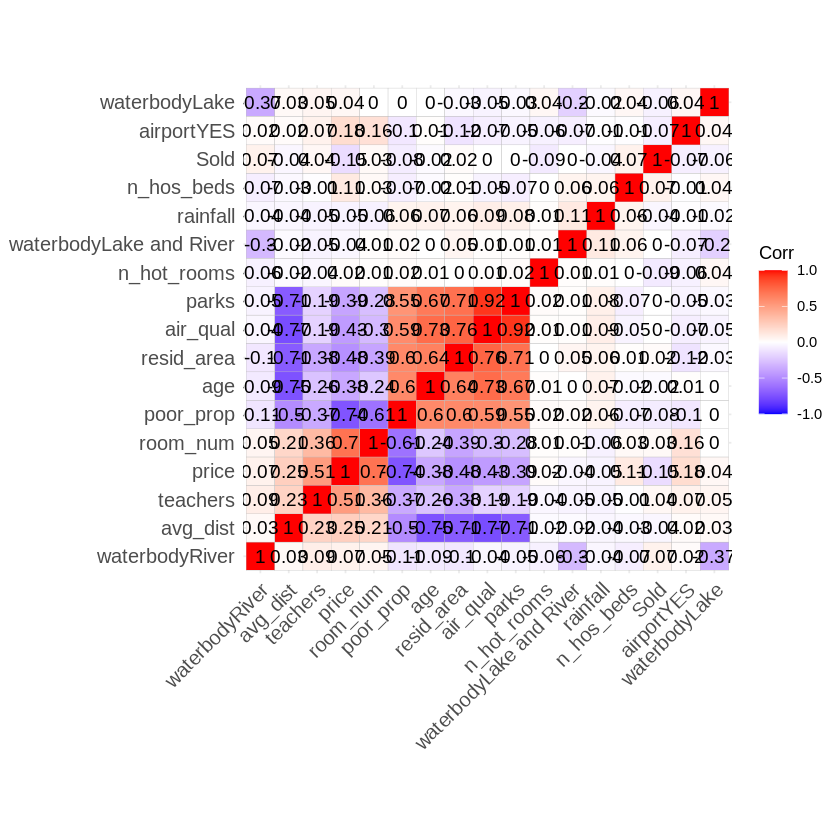

In [66]:
install.packages("ggcorrplot")
library(ggcorrplot)
M <- cor(df)
#corrplot(M, method = "number")
#ggcorrplot(M)
ggcorrplot(M,hc.order = TRUE,lab = TRUE)

In [67]:
round(cor(df),2)
cor(df$air_qual,df$parks)

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airportYES,n_hos_beds,n_hot_rooms,waterbodyLake,waterbodyLake and River,waterbodyRiver,rainfall,parks,Sold,avg_dist
price,1.00,-0.48,-0.43,0.70,-0.38,0.51,-0.74,0.18,0.11,0.02,0.04,-0.04,0.07,-0.05,-0.39,-0.15,0.25
resid_area,-0.48,1.00,0.76,-0.39,0.64,-0.38,0.60,-0.12,0.01,0.00,-0.03,0.05,-0.10,0.06,0.71,0.02,-0.71
air_qual,-0.43,0.76,1.00,-0.30,0.73,-0.19,0.59,-0.07,-0.05,0.01,-0.05,0.01,-0.04,0.09,0.92,0.00,-0.77
room_num,0.70,-0.39,-0.30,1.00,-0.24,0.36,-0.61,0.16,0.03,0.01,0.00,0.01,0.05,-0.06,-0.28,0.03,0.21
age,-0.38,0.64,0.73,-0.24,1.00,-0.26,0.60,0.01,-0.02,0.01,0.00,0.00,-0.09,0.07,0.67,-0.02,-0.75
teachers,0.51,-0.38,-0.19,0.36,-0.26,1.00,-0.37,0.07,-0.01,-0.04,0.05,-0.05,0.09,-0.05,-0.19,0.04,0.23
poor_prop,-0.74,0.60,0.59,-0.61,0.60,-0.37,1.00,-0.10,-0.07,0.02,0.00,0.02,-0.11,0.06,0.55,-0.08,-0.50
airportYES,0.18,-0.12,-0.07,0.16,0.01,0.07,-0.10,1.00,-0.01,-0.06,0.04,-0.07,0.02,-0.01,-0.05,-0.07,0.02
n_hos_beds,0.11,0.01,-0.05,0.03,-0.02,-0.01,-0.07,-0.01,1.00,0.00,0.04,0.06,-0.07,0.06,-0.07,0.07,-0.03
n_hot_rooms,0.02,0.00,0.01,0.01,0.01,-0.04,0.02,-0.06,0.00,1.00,0.04,0.01,-0.06,0.01,0.02,-0.09,-0.02


[1] 0.9155436

In [68]:
df <- df[-c(15)]
head(df)

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airportYES,n_hos_beds,n_hot_rooms,waterbodyLake,waterbodyLake and River,waterbodyRiver,rainfall,Sold,avg_dist
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
1,24.0,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.19200,0,0,1,23,0,4.0875
2,21.6,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.17280,1,0,0,42,1,4.9675
3,34.7,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,46.19856,0,0,0,38,0,4.9675
4,33.4,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.26720,1,0,0,45,0,6.0650
5,36.2,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.28960,1,0,0,55,0,6.0625
6,28.7,32.18,0.458,6.430,58.7,21.3,5.21,1,7.174,14.22960,0,0,0,53,1,6.0600


##Test Train Split

In [69]:
install.packages('caTools')
library(caTools)
set.seed(0)
split = sample.split(df,SplitRatio = 0.8)
training = subset(df, split == TRUE)
test = subset(df, split == FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##Logistic Regression

In [70]:
trial_LR.fit <- glm(Sold~., data = training, family = binomial)
summary(trial_LR.fit)


Call:
glm(formula = Sold ~ ., family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0558  -0.9618  -0.2943   0.9330   2.3398  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -2.807041   3.171061  -0.885 0.376046    
price                     -0.296875   0.040412  -7.346 2.04e-13 ***
resid_area                 0.029054   0.030897   0.940 0.347040    
air_qual                  -4.891743   2.086009  -2.345 0.019026 *  
room_num                   1.214817   0.330308   3.678 0.000235 ***
age                        0.003788   0.007673   0.494 0.621541    
teachers                   0.321621   0.076425   4.208 2.57e-05 ***
poor_prop                 -0.248271   0.042045  -5.905 3.53e-09 ***
airportYES                -0.177159   0.246137  -0.720 0.471674    
n_hos_beds                 0.170424   0.081776   2.084 0.037158 *  
n_hot_rooms               -0.050859   0.059367  -0.857 0

In [71]:
test_LR.probs = predict(trial_LR.fit,test, type='response')
LR_predict_bin <- ifelse(test_LR.probs > 0.5,1,0)
CM_LR <- table(LR_predict_bin,test$Sold)
Accuracy_LR <- (sum(diag(cm_LR))/sum(cm_LR))
CM_LR
Accuracy_LR

              
LR_predict_bin  0  1
             0 52 26
             1 22 28

[1] 0.625

##Support Vector Machine

In [72]:
install.packages('e1071')
library(e1071)
train_svm = svm(Sold ~ .,data = training, kernel = "linear",cost=1,scale = FALSE)
summary(trial_LR.fit)
svm_predict <- predict(train_svm,newdata = test,type="response")
svm_predict_bin <- ifelse(svm_predict > 0.5,1,0)
cm_svm <- table(svm_predict_bin,test$Sold) 
svm_accuracy <- (sum(diag(cm_svm))/sum(cm_svm))
cm_svm
svm_accuracy

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
glm(formula = Sold ~ ., family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0558  -0.9618  -0.2943   0.9330   2.3398  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -2.807041   3.171061  -0.885 0.376046    
price                     -0.296875   0.040412  -7.346 2.04e-13 ***
resid_area                 0.029054   0.030897   0.940 0.347040    
air_qual                  -4.891743   2.086009  -2.345 0.019026 *  
room_num                   1.214817   0.330308   3.678 0.000235 ***
age                        0.003788   0.007673   0.494 0.621541    
teachers                   0.321621   0.076425   4.208 2.57e-05 ***
poor_prop                 -0.248271   0.042045  -5.905 3.53e-09 ***
airportYES                -0.177159   0.246137  -0.720 0.471674    
n_hos_beds                 0.170424   0.081776   2.084 0.037158 *  
n_hot_rooms               -0.050859   0.059367  -0.857 0

               
svm_predict_bin  0  1
              0 51 22
              1 23 32

[1] 0.6484375

##ROC Curves

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



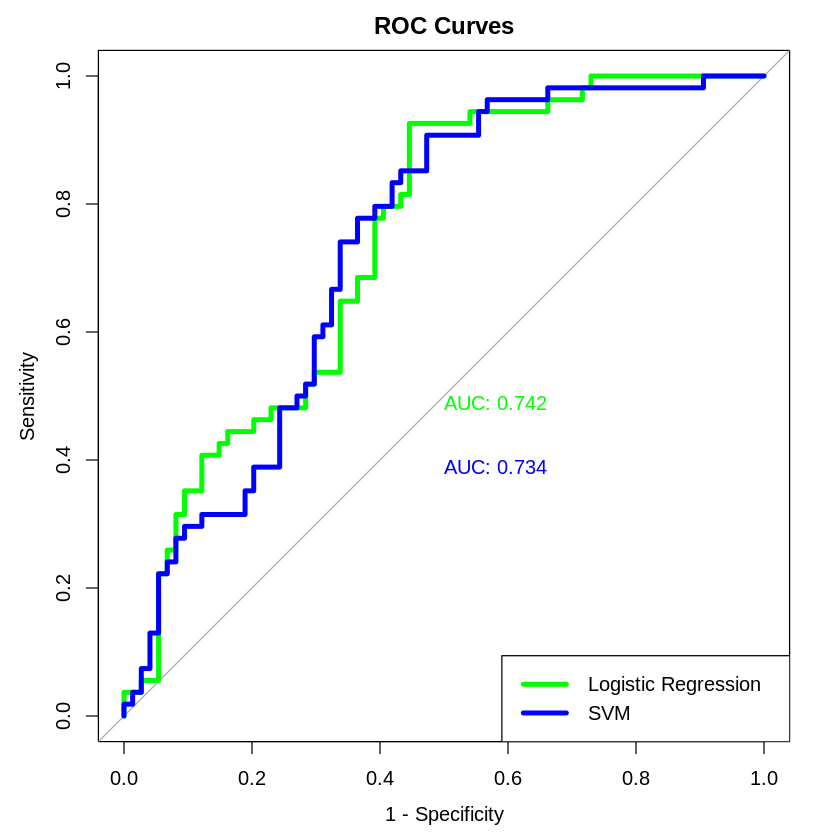

In [73]:
install.packages('pROC')
library(pROC)
par(pty="s") 
lrROC <- roc(test$Sold ~ test_LR.probs,plot=TRUE,print.auc=TRUE,col="green",lwd =4,legacy.axes=TRUE,main="ROC Curves") #Setting levels: control = 0, case = 1
#Setting direction: controls < cases
svmROC <- roc(test$Sold ~ svm_predict,plot=TRUE,print.auc=TRUE,col="blue",lwd = 4,print.auc.y=0.4,legacy.axes=TRUE,add = TRUE)
#Setting levels: control = 0, case = 1 
#Setting direction: controls < cases
legend("bottomright",legend=c("Logistic Regression","SVM"),col=c("green","blue"),lwd=4)